In [1]:
!pip install gym

In [3]:
import gym
print(gym.__version__)

0.26.2


In [4]:
import gym
# env = gym.make('FrozenLake-v1', render_mode='ansi')
env = gym.make('FrozenLake-v1', render_mode='rgb_array')
env.reset()
env.render()

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]

In [5]:
env.close()

In [6]:
import gym
env = gym.make('FrozenLake-v1', render_mode='ansi')
# env = gym.make('FrozenLake-v1', render_mode='rgb_array')
env.reset()
env.render()

'\n\x1bS\x1bFFF\nFHFH\nFFFH\nHFFG\n'

In [7]:
import gym
env = gym.make('FrozenLake-v1', render_mode='ansi')
env.reset()
print(env.render())


SFFF
FHFH
FFFH
HFFG



In [8]:
# S를 출발하여 H에 빠지지 않고 F를 통과해서 G에 도달하는 것이 목적임.
# S : 현재의 State
# H : Hole
# F : 호수가 얼은 부분
# G : 최종 목적지

# SFFF
# FHFH
# FFFH
# HFFG

In [9]:
env.close()

In [10]:
# Discrete(16) : 16개의 유한한 state (0 ~ 15)
print(env.observation_space)

Discrete(16)


In [11]:
# Discrete(4) : 유한한 4개(0 ~ 3)의 Action
# FrozenLake의 Action : 4개로 구성
# Left : 0, Down : 1, Right : 2, Up : 3

print(env.action_space)

Discrete(4)


In [12]:
print(env.observation_space.n)
print(env.action_space.n)

16
4


In [13]:
# P[state][action] = ㅠ(action | state)
# [p(s'|s, a), s', r, terminal 여부]

# p(s'|s, a) : 현재 State s에서 Action a를 선택하여 s'으로 이동할 확률
# 다음 state s'
# reward
# s'이 Terminal State인지의 해당 여부

print(env.P[0][0])
print(env.P[15][1])
print(env.P[5][0])

[(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 4, 0.0, False)]
[(1.0, 15, 0, True)]
[(1.0, 5, 0, True)]


In [14]:
# State 0에서 Action 0 (Left)를 취하면 0.66의 확률로 State 0에 계속 머물고, 0.33의 확률로 State 4로 이동함.
print(env.P[0][0])

[(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 4, 0.0, False)]


In [15]:
# State 15가 G이므로 어떤 Action은 취해도 최종 목적지에 계속 머물고 있으며, G가 Terminal State임을 의미함.
print(env.P[15][1])

[(1.0, 15, 0, True)]


In [16]:
# State 5가 Hole이므로 Terminal State이며 State 5에 계속 머물고 있음을 의미함.
print(env.P[5][0])

[(1.0, 5, 0, True)]


In [18]:
state = env.reset()
print(env.render())

# [S]FFF
# FHFH
# FFFH
# HFFG


SFFF
FHFH
FFFH
HFFG



In [19]:
# Action 1 : Down을 취했을 때의 결과
# (next_state, reward, Terminal 여부, Information)
print(env.step(1))

(1, 0.0, False, False, {'prob': 0.3333333333333333})


In [20]:
print(env.render())

# SFFF
# [F]HFH
# FFFH
# HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG



In [26]:
import gym
env = gym.make('FrozenLake-v1', render_mode='ansi')
state = env.reset()

print('Time Step 0:')
print(env.render())

num_timesteps = 20

for t in range(num_timesteps):
  random_action = env.action_space.sample()

  new_state, reward, done, _, _ = env.step(random_action)
  env.step(random_action)
  print(f'timestep {t+1}:')

  print(env.render())

  if done:
    break

Time Step 0:

SFFF
FHFH
FFFH
HFFG

timestep 1:
  (Left)
SFFF
FHFH
FFFH
HFFG

timestep 2:
  (Up)
SFFF
FHFH
FFFH
HFFG

timestep 3:
  (Up)
SFFF
FHFH
FFFH
HFFG



### 1. 정책 반복법(Policy Iteration)을 이용하여 최적 Policy 산출

In [27]:
import numpy as np
import gym
env = gym.make('FrozenLake-v1', render_mode='ansi')

def value_iteration(env):
  num_iterations = 5000
  thre = 1e-20
  gamma = 0.9
  value_table = np.zeros(env.observation_space.n)

  for i in range(num_iterations):
    updated_value_table = np.copy(value_table)

    for s in range(env.observation_space.n):
      q_values = [sum([prob*(r+gamma*updated_value_table[s_]) for prob, s_, r, _ in env.P[s][a]]) for a in range(env.action_space.n)]
      value_table[s] = max(q_values)

    if (np.sum(np.fabs(updated_value_table-value_table))<=thre):
      break
  return value_table

In [28]:
def policy_iteration(value_table):
  gamma = 0.9
  policy = np.zeros(env.observation_space.n)

  for s in range(env.observation_space.n):
    q_values = [sum([prob*(r+gamma*value_table[s_]) for prob, s_, r, _ in env.P[s][a]]) for a in range(env.action_space.n)]
    policy[s] = np.argmax(np.array(q_values))
  return policy

In [29]:
optimal_value_function = value_iteration(env)
optimal_policy = policy_iteration(optimal_value_function)

In [30]:
print(optimal_value_function)
print(optimal_policy)

[0.0688909  0.06141457 0.07440976 0.05580732 0.09185454 0.
 0.11220821 0.         0.14543635 0.24749695 0.29961759 0.
 0.         0.3799359  0.63902015 0.        ]
[0. 3. 0. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


In [34]:
obs = env.reset()
episode_reward = 0.0

for i in range(20):
  action = np.int_(optimal_policy[obs])
  # obs, reward, done, info = env.step(action)
  obs, reward, done, truncated, info = env.step(action)
  print(env.render())
  episode_reward += reward
  if done:
    print('rewards :', episode_reward)
    episode_reward = 0.0
    obs = env.reset()

### 2. 가치 반복법(Value Iteration)을 이용하여 최적 Policy 산출

In [78]:
import numpy as np
import gym
env = gym.make('FrozenLake-v1', render_mode='ansi')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [79]:
def value_iteration(env):
  num_iterations = 5000
  thre = 1e-20
  gamma = 0.9
  value_table = np.zeros(env.observation_space.n)

  for i in range(num_iterations):
    updated_value_table = np.copy(value_table)
    for s in range(env.observation_space.n):
      q_values = [sum([prob*(r+gamma*updated_value_table[s_]) for prob, s_, r, _ in env.P[s][a]]) for a in range(env.action_space.n)]
      value_table[s] = max(q_values)

    if (np.sum(np.fabs(updated_value_table - value_table)) <= thre):
      break
  return value_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
def policy_iteration(value_table):
  gamma = 0.9
  policy = np.zeros(env.observation_space.n)

  for s in range(env.observation_space.n):
    q_values = [sum([prob * (r + gamma*value_table[s_]) for prob, s_, r, _ in env.P[s][a]]) for a in range(env.action_space.n)]
    policy[s] = np.argmax(np.array(q_values))
  return policy

In [87]:
optimal_value_function = value_iteration(env)
optimal_policy = policy_iteration(optimal_value_function)

In [88]:
print(optimal_value_function)
print(optimal_policy)

[0.0688909  0.06141457 0.07440976 0.05580732 0.09185454 0.
 0.11220821 0.         0.14543635 0.24749695 0.29961759 0.
 0.         0.3799359  0.63902015 0.        ]
[0. 3. 0. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


In [90]:
obs = env.reset()
episode_reward = 0.0

for i in range(20):
  action = np.int_(optimal_policy[obs])
  obs, reward, done, info = env.step(action)
  print(env.render())
  episode_reward += reward
  if done:
    print('rewards:', episode_reward)
    episode_reward = 0.0
    obs = env.reset()

['\n\x1bS\x1bFFF\nFHFH\nFFFH\nHFFG\n', '  (Left)\n\x1bS\x1bFFF\nFHFH\nFFFH\nHFFG\n']
['  (Left)\n\x1bS\x1bFFF\nFHFH\nFFFH\nHFFG\n']
['  (Left)\n\x1bS\x1bFFF\nFHFH\nFFFH\nHFFG\n']
['  (Left)\nSFFF\n\x1bF\x1bHFH\nFFFH\nHFFG\n']
['  (Left)\n\x1bS\x1bFFF\nFHFH\nFFFH\nHFFG\n']
['  (Left)\nSFFF\n\x1bF\x1bHFH\nFFFH\nHFFG\n']
['  (Left)\nSFFF\nFHFH\n\x1bF\x1bFFH\nHFFG\n']
['  (Up)\nSFFF\nFHFH\nF\x1bF\x1bFH\nHFFG\n']
['  (Down)\nSFFF\nFHFH\nFFFH\nH\x1bF\x1bFG\n']
['  (Right)\nSFFF\nFHFH\nFFFH\nH\x1bF\x1bFG\n']
['  (Right)\nSFFF\nFHFH\nFFFH\nH\x1bF\x1bFG\n']
['  (Right)\nSFFF\nFHFH\nF\x1bF\x1bFH\nHFFG\n']
['  (Down)\nSFFF\nFHFH\n\x1bF\x1bFFH\nHFFG\n']
['  (Up)\nSFFF\nFHFH\n\x1bF\x1bFFH\nHFFG\n']
['  (Up)\nSFFF\n\x1bF\x1bHFH\nFFFH\nHFFG\n']
['  (Left)\nSFFF\nFHFH\n\x1bF\x1bFFH\nHFFG\n']
['  (Up)\nSFFF\n\x1bF\x1bHFH\nFFFH\nHFFG\n']
['  (Left)\nSFFF\nFHFH\n\x1bF\x1bFFH\nHFFG\n']
['  (Up)\nSFFF\nFHFH\n\x1bF\x1bFFH\nHFFG\n']
['  (Up)\nSFFF\nFHFH\nF\x1bF\x1bFH\nHFFG\n']


### 그림으로 시각화한 버전
#### FrozenLake-v1

In [37]:
import gym
from gym import envs
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mediapy as media
from moviepy.video.io.bindings import mplfig_to_npimage
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
np.set_printoptions(precision=2)
print ("gym:[%s]"%(gym.__version__))
print ("numpy:[%s]"%(np.__version__))
print ("matplotlib:[%s]"%(matplotlib.__version__))

gym:[0.26.2]
numpy:[1.21.6]
matplotlib:[3.5.3]


In [38]:
env = gym.make('FrozenLake-v1', render_mode='rgb_array')

In [45]:
def plot_env(env, figsize=(4, 4), title_str=None, title_fs=10, PLOT_IMG=True, RETURN_IMG=False):
    img = env.render()
    fig = plt.figure(figsize=figsize)
    plt.imshow(img)
    # plt.axis('off')
    
    if title_str is not None:
        plt.title(title_str, fontsize=title_fs)
    if PLOT_IMG:
        plt.show()
    if RETURN_IMG:
        img = mplfig_to_npimage(fig)
        plt.close()
        return img

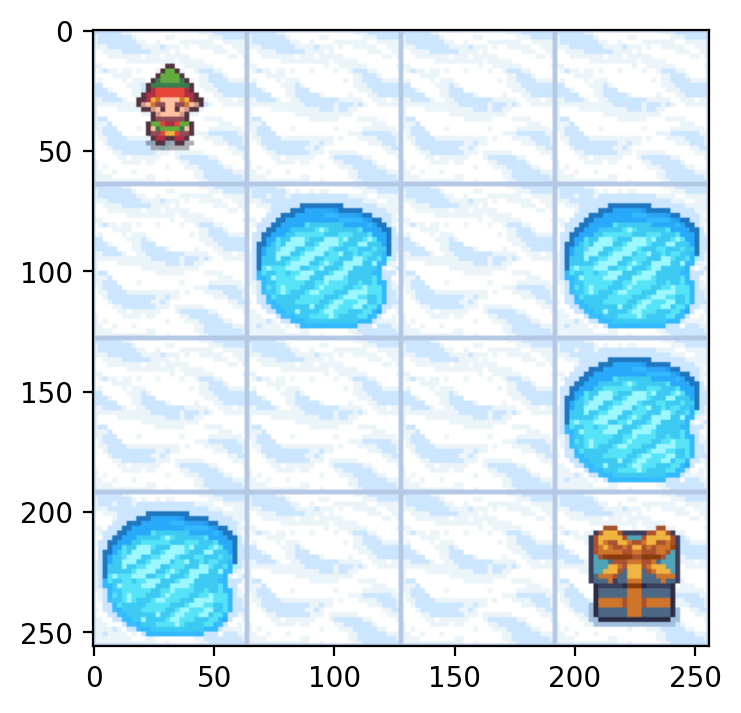

In [46]:
env.reset()
plot_env(env, figsize=(4, 4))

In [48]:
obs_space = env.observation_space
n_state = obs_space.n
action_space = env.action_space
n_action = action_space.n

print(obs_space)
print(n_state)
print(action_space)
print(n_action)

Discrete(16)
16
Discrete(4)
4


In [49]:
env.reset()
n_step = 50
frames = []
for tick in range(n_step):
    action = env.action_space.sample()
    
    # step
    observation, reward, done, truncated, info = env.step(action)
    
    title_str = "tick:[%d/%d] action:[%s] reward:[%.2f] done:[%d]"%(
        tick,n_step,action,reward,done
    )
    
    img = plot_env(env, figsize=(4, 4), title_str=title_str, title_fs=8, PLOT_IMG=False, RETURN_IMG=True)
    
    frames.append(img)
    
    if done:
        break

env.close()

print(tick)

8


In [52]:
# media.show_video(frames, fps=5)

In [53]:
P = env.unwrapped.P

# for all states
for s in P.keys():
    # for all actions
    for a in P[s].keys():
        for (prob, s_prime, rwd, _) in P[s][a]:
            print("P(s' : %02d | s: %02d, a : %02d) = %.2f, Reward = %.2f" % (s_prime, s, a, prob, rwd))

P(s' : 00 | s: 00, a : 00) = 0.33, Reward = 0.00
P(s' : 00 | s: 00, a : 00) = 0.33, Reward = 0.00
P(s' : 04 | s: 00, a : 00) = 0.33, Reward = 0.00
P(s' : 00 | s: 00, a : 01) = 0.33, Reward = 0.00
P(s' : 04 | s: 00, a : 01) = 0.33, Reward = 0.00
P(s' : 01 | s: 00, a : 01) = 0.33, Reward = 0.00
P(s' : 04 | s: 00, a : 02) = 0.33, Reward = 0.00
P(s' : 01 | s: 00, a : 02) = 0.33, Reward = 0.00
P(s' : 00 | s: 00, a : 02) = 0.33, Reward = 0.00
P(s' : 01 | s: 00, a : 03) = 0.33, Reward = 0.00
P(s' : 00 | s: 00, a : 03) = 0.33, Reward = 0.00
P(s' : 00 | s: 00, a : 03) = 0.33, Reward = 0.00
P(s' : 01 | s: 01, a : 00) = 0.33, Reward = 0.00
P(s' : 00 | s: 01, a : 00) = 0.33, Reward = 0.00
P(s' : 05 | s: 01, a : 00) = 0.33, Reward = 0.00
P(s' : 00 | s: 01, a : 01) = 0.33, Reward = 0.00
P(s' : 05 | s: 01, a : 01) = 0.33, Reward = 0.00
P(s' : 02 | s: 01, a : 01) = 0.33, Reward = 0.00
P(s' : 05 | s: 01, a : 02) = 0.33, Reward = 0.00
P(s' : 02 | s: 01, a : 02) = 0.33, Reward = 0.00
P(s' : 01 | s: 01, a

#### FrozenLake8x8-v1

In [54]:
env = gym.make('FrozenLake8x8-v1', render_mode='rgb_array')

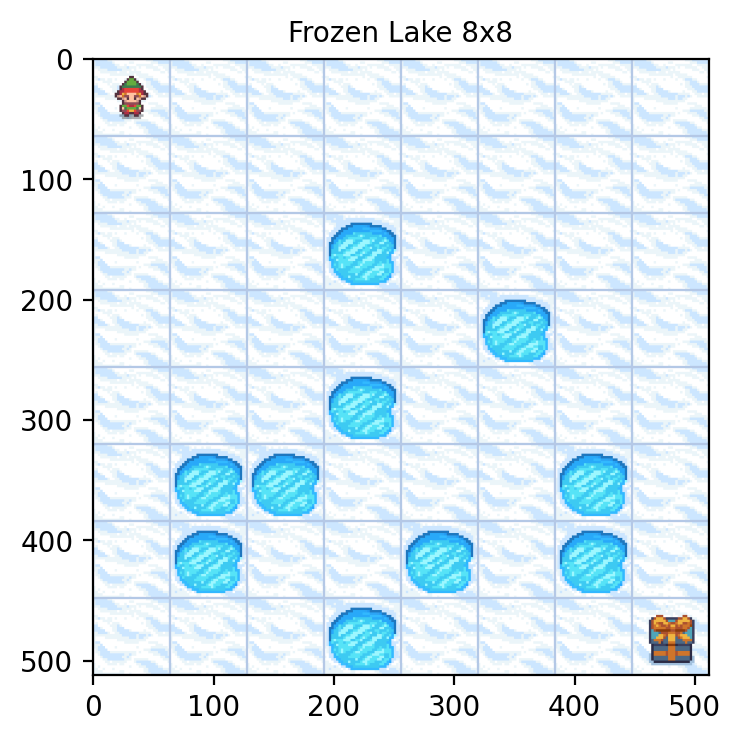

In [55]:
env.reset()
plot_env(env, figsize=(4, 4), title_str='Frozen Lake 8x8', title_fs=10)

In [56]:
obs_space = env.observation_space
n_state = obs_space.n
action_space = env.action_space
n_action = action_space.n

print(obs_space)
print(n_state)
print(action_space)
print(n_action)

Discrete(64)
64
Discrete(4)
4


In [57]:
env.reset()
n_step = 50
frames = []
for tick in range(n_step):
    action = env.action_space.sample()
    
    # step
    observation, reward, done, truncated, info = env.step(action)
    
    title_str = "tick:[%d/%d] action:[%s] reward:[%.2f] done:[%d]"%(
        tick,n_step,action,reward,done
    )
    
    img = plot_env(env, figsize=(4, 4), title_str=title_str, title_fs=8, PLOT_IMG=False, RETURN_IMG=True)
    
    frames.append(img)
    
    if done:
        break

env.close()

print(tick)

10


In [58]:
P = env.unwrapped.P

# for all states
for s in P.keys():
    # for all actions
    for a in P[s].keys():
        for (prob, s_prime, rwd, _) in P[s][a]:
            print("P(s' : %02d | s: %02d, a : %02d) = %.2f, Reward = %.2f" % (s_prime, s, a, prob, rwd))

P(s' : 00 | s: 00, a : 00) = 0.33, Reward = 0.00
P(s' : 00 | s: 00, a : 00) = 0.33, Reward = 0.00
P(s' : 08 | s: 00, a : 00) = 0.33, Reward = 0.00
P(s' : 00 | s: 00, a : 01) = 0.33, Reward = 0.00
P(s' : 08 | s: 00, a : 01) = 0.33, Reward = 0.00
P(s' : 01 | s: 00, a : 01) = 0.33, Reward = 0.00
P(s' : 08 | s: 00, a : 02) = 0.33, Reward = 0.00
P(s' : 01 | s: 00, a : 02) = 0.33, Reward = 0.00
P(s' : 00 | s: 00, a : 02) = 0.33, Reward = 0.00
P(s' : 01 | s: 00, a : 03) = 0.33, Reward = 0.00
P(s' : 00 | s: 00, a : 03) = 0.33, Reward = 0.00
P(s' : 00 | s: 00, a : 03) = 0.33, Reward = 0.00
P(s' : 01 | s: 01, a : 00) = 0.33, Reward = 0.00
P(s' : 00 | s: 01, a : 00) = 0.33, Reward = 0.00
P(s' : 09 | s: 01, a : 00) = 0.33, Reward = 0.00
P(s' : 00 | s: 01, a : 01) = 0.33, Reward = 0.00
P(s' : 09 | s: 01, a : 01) = 0.33, Reward = 0.00
P(s' : 02 | s: 01, a : 01) = 0.33, Reward = 0.00
P(s' : 09 | s: 01, a : 02) = 0.33, Reward = 0.00
P(s' : 02 | s: 01, a : 02) = 0.33, Reward = 0.00
P(s' : 01 | s: 01, a